In [6]:
from PIL import Image
import numpy as np
from PIL import ImageChops
from PIL import ImageStat as stat
import matplotlib.pyplot as plt
from random import randint

Zadanie 1

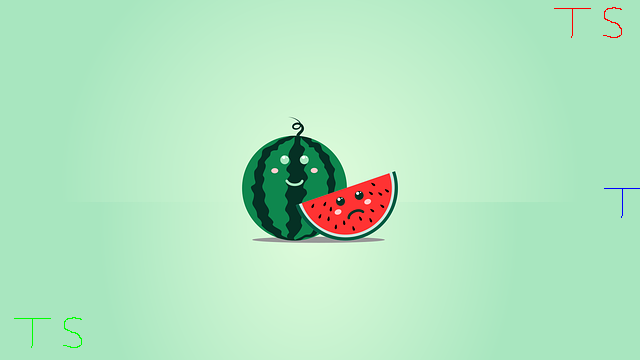

In [7]:
ini = Image.open('inicjaly.bmp')
baz = Image.open('obraz.png')
def wstaw_inicjaly(obraz_bazowy, obraz_wstawiany, m, n, kolor):
    if obraz_wstawiany.mode != '1':
        return "Nieprawidłowy tryb obrazu wstawianego"
    np_baza = np.asarray(obraz_bazowy).astype(np.int_)
    h0, w0, c = np_baza.shape
    np_wstawiany = np.asarray(obraz_wstawiany).astype(np.int_)
    h,w = np_wstawiany.shape
    n_k = min(h0, n+h)
    m_k = min(w0, m+w)
    n_p = max(0,n)
    m_p = max(0, m)
    for i in range(n_p, n_k):
        for j in range(m_p,m_k):
            if np_wstawiany[i-n, j-m] == 0:
                np_baza[i][j] = kolor
    return Image.fromarray(np_baza.astype(np.uint8))
obraz1 = wstaw_inicjaly(baz, ini, baz.width - ini.width, 0, [255, 0, 0])  # Prawy górny róg
obraz2 = wstaw_inicjaly(obraz1, ini, 0, baz.height - ini.height, [0, 255, 0])             # Lewy dolny róg
obraz3 = wstaw_inicjaly(obraz2, ini, baz.width - ini.width// 2, baz.height // 2, [0, 0, 255])    # Środek wysokości


obraz3.save('obraz_inicjaly.png')
obraz3

![zdjęcie pierwsze](obraz_inicjaly.png)

Zadanie 2

średnia  [1.4660590277777779, 0.8885503472222223, 0.8184852430555556]
mediana  [0, 0, 0]
odchylenie standardowe  [5.730877237664613, 3.049580313093397, 2.5078677164653596]


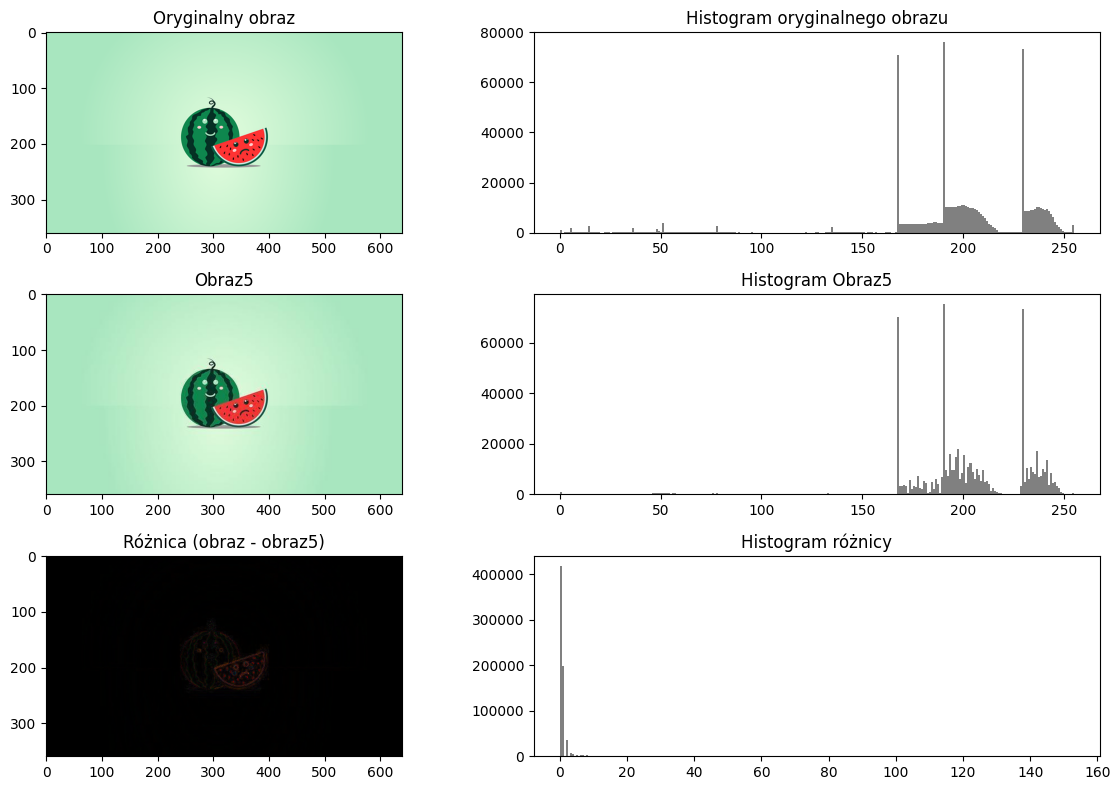

In [8]:
obraz = Image.open("obraz.png")
obraz.save("obraz1.jpg")

for i in range(1, 5):
    img = Image.open(f"obraz{i}.jpg")
    img.save(f"obraz{i + 1}.jpg")

# Różnice między oryginałem i obraz5

obraz = Image.open("obraz.png")
obraz5 = Image.open("obraz5.jpg")


# Różnice między obrazami
roznica = ImageChops.difference(obraz, obraz5)

# Statystyki różnicy
roznica_np = np.array(roznica)
def statystyki(im):
    s = stat.Stat(im)
    print("średnia ", s.mean)  # srednia
    print("mediana ", s.median)  # mediana
    print("odchylenie standardowe ", s.stddev) # odchylenie standardowe
statystyki(roznica)


# Histogramy obrazów i różnicy
fig, axs = plt.subplots(3, 2, figsize=(12, 8))
axs[0, 0].imshow(obraz)
axs[0, 0].set_title("Oryginalny obraz")
axs[0, 1].hist(np.array(obraz).flatten(), bins=256, color="gray")
axs[0, 1].set_title("Histogram oryginalnego obrazu")

axs[1, 0].imshow(obraz5)
axs[1, 0].set_title("Obraz5")
axs[1, 1].hist(np.array(obraz5).flatten(), bins=256, color="gray")
axs[1, 1].set_title("Histogram Obraz5")

axs[2, 0].imshow(roznica, cmap="gray")
axs[2, 0].set_title("Różnica (obraz - obraz5)")
axs[2, 1].hist(roznica_np.flatten(), bins=256, color="gray")
axs[2, 1].set_title("Histogram różnicy")

plt.tight_layout()
plt.show()





![zdjęcie drugie](ooi5.png)
<br>

średnia  [0.013467881944444444]
mediana  [0]
odchylenie standardowe  [0.1359318591155038]


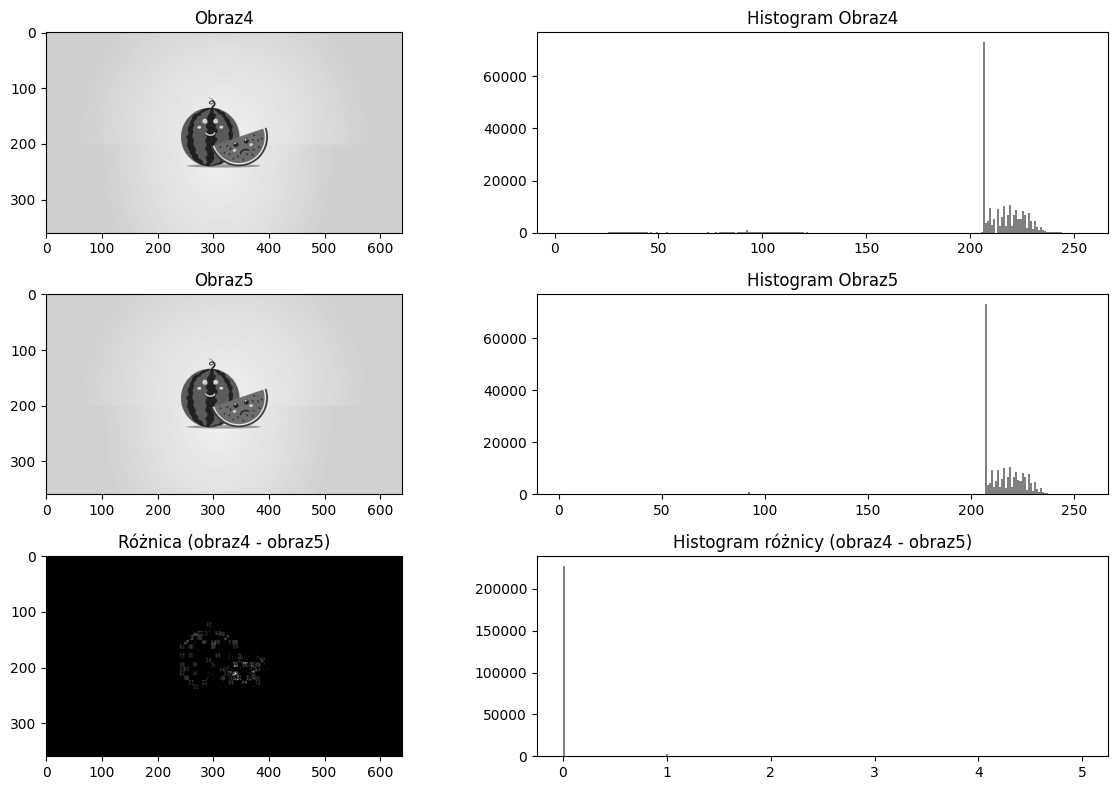

In [9]:
# Różnice między obraz4 i obraz5
# Wczytanie obrazów w szarości żeby łatwiej było widać różnice
obraz4 = Image.open("obraz4.jpg").convert('L')
obraz5 = obraz5.convert('L')

# Obliczenie różnicy
roznica_4_5 = ImageChops.difference(obraz4, obraz5)

# Statystyki różnicy
roznica_4_5_np = np.array(roznica_4_5)
statystyki(roznica_4_5)

fig, axs = plt.subplots(3, 2, figsize=(12, 8))
axs[0, 0].imshow(obraz4, cmap='gray')
axs[0, 0].set_title("Obraz4")
axs[0, 1].hist(np.array(obraz4).flatten(), bins=256, color="gray")
axs[0, 1].set_title("Histogram Obraz4")

axs[1, 0].imshow(obraz5, cmap='gray')
axs[1, 0].set_title("Obraz5")
axs[1, 1].hist(np.array(obraz5).flatten(), bins=256, color="gray")
axs[1, 1].set_title("Histogram Obraz5")

axs[2, 0].imshow(roznica_4_5, cmap='gray')
axs[2, 0].set_title("Różnica (obraz4 - obraz5)")
axs[2, 1].hist(roznica_4_5_np.flatten(), bins=256, color="gray")
axs[2, 1].set_title("Histogram różnicy (obraz4 - obraz5)")

plt.tight_layout()
plt.show()

Różnice w przypadku porównania obrazów 4 i 5 są minimalne w porównaniu do oryginału i obrazu 5 dlatego wczytałem różnice w 4 i 5 w odcieniach szarości.


![zdjęcie trzecie](o4i5.png)
<br>

Zad 3

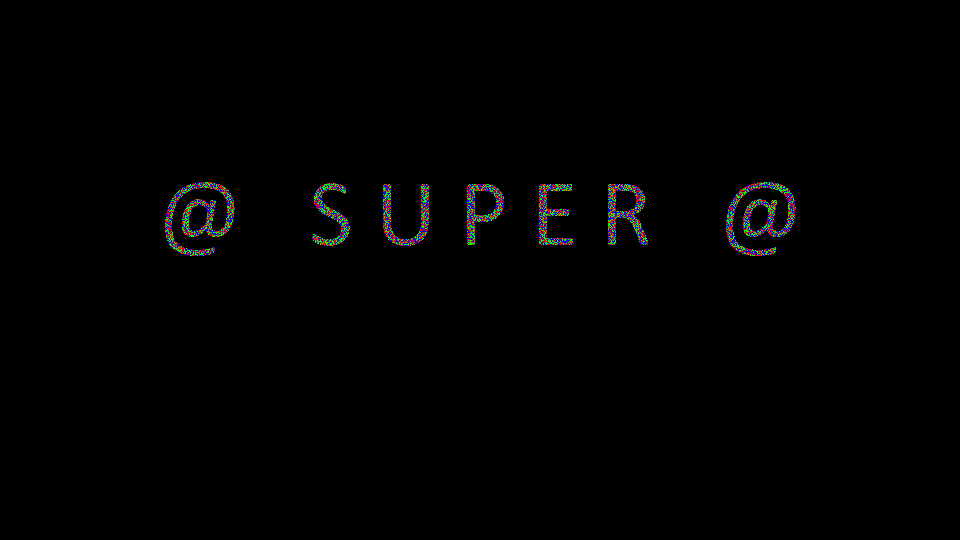

In [10]:
def odkoduj(obraz1, obraz2):
    tab_obraz1 = np.array(obraz1)
    tab_obraz2 = np.array(obraz2)

    roznice = np.where(tab_obraz1 != tab_obraz2, 255, 0).astype(np.uint8)

    return Image.fromarray(roznice)

jesien = Image.open("jesien.jpg")
zakodowany1 = Image.open("zakodowany2.bmp")

odkod = odkoduj(jesien, zakodowany1)
odkod

![zdjęcie czwarte](kod2.bmp)
<br>